## Week 2
- 多元线性回归
- 可视化

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [44]:
# 加载数据
def load_data(path='./data/ex1data2.txt'):
    data = np.loadtxt(path, delimiter=',')
    X_train = data[:, :-1]
    y_train = data[:, -1]

    print(data.shape)
    print(X_train.shape, y_train.shape)
    return X_train, y_train


# Z-标准化  
def Z_score_normalize(X):
    X_mean = np.mean(X, axis=0)  # (2,) -> (1, 2)
    X_std = np.std(X, axis=0)    # (2,) -> (1, 2)
    X = (X - X_mean) / X_std     # (47, 2)
    return X, X_mean, X_std


# 初始化参数 (m样本, n特征)
def get_init_parma(X):
    w = np.zeros(X.shape[1])    
    b = 0.0
    return w, b


# 均方误差损失函数 (m样本,)
def mse_loss(y_true, y_pred):  
    return 0.5 * np.mean((y_true - y_pred) ** 2)


# 前向计算，返回y_pred
# (m样本, n特征) np.dot (n特征,) -> (m样本,)
def forward(X, W, b):
    return np.dot(X, W) + b    


# 计算梯度 
# X:(m样本, n特征) y_true:(m样本,) y_pred:(m样本,)
# y_pred - y_true: (m样本,) -> (1, m) -> reshape成 (m, 1) -> 广播 (m, n)
def gradient(X, y_true, y_pred):
    dw = np.mean((y_pred - y_true).reshape((-1, 1)) * X  ,axis=0) 
    db = np.mean(y_pred - y_true)
    return dw, db


# 更新参数
def update(W, b, dw, db, learning_rate):
    W -= learning_rate * dw
    b -= learning_rate * db
    return W, b


# 训练
def train(X, y, learning_rate=0.01, epochs=1000):
    print(f'Training start... lr={learning_rate}, epochs={epochs}')
    W, b = get_init_parma(X)
    loss_list = []

    for epoch in range(epochs):
        y_pred = forward(X, W, b)
        loss = mse_loss(y, y_pred)
        dw, db = gradient(X, y, y_pred)
        W, b = update(W, b, dw, db, learning_rate)
        loss_list.append(loss)

        if epoch % (epochs // 10) == 0:
            print(f'Epoch {epoch} / {epochs}, Loss: {loss}, W: {W}, b: {b}')

    print('Training finished.')
    return W, b, loss_list


# 预测，先Z标准化（注意用的是训练集的均值和标准差）
def predict(X_test, W, b, mean, std):
    X_test = (X_test - mean) / std
    return forward(X_test, W, b)


# 绘制损失曲线
def plot_loss(loss_list):
    plt.plot(range(len(loss_list)), loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss over Epochs')
    plt.show()


# 可视化预测结果
def show(X, y_true, y_pred):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].scatter(X[:, 0], y_true, color='b', label='True Prices')
    ax[0].scatter(X[:, 0], y_pred, color='r', marker='x', label='Predicted Prices')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Price')
    ax[0].legend()
    ax[0].set_title('True vs Predicted Prices')

    ax[1].scatter(X[:, 1], y_true, color='b', label='True Prices')
    ax[1].scatter(X[:, 1], y_pred, color='r', marker='x', label='Predicted Prices')
    ax[1].set_xlabel('Feature 2')
    ax[1].set_ylabel('Price')
    ax[1].legend()
    ax[1].set_title('True vs Predicted Prices')
    plt.show()


In [45]:
# 测试代码
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7, 8, 9])
w = np.array([1, 2])
b = 0.5
y_pred = forward(X, w, b)

print(Z_score_normalize(X))
print(get_init_parma(X))
print(y_pred)  
print(mse_loss(y, y_pred))
print(gradient(X, y, y_pred))


(array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]]), array([3., 4.]), array([1.63299316, 1.63299316]))
(array([0., 0.]), 0.0)
[ 5.5 11.5 17.5]
14.458333333333334
(array([17.16666667, 20.66666667]), np.float64(3.5))


(47, 3)
(47, 2) (47,)
Training start... lr=0.01, epochs=10000
Epoch 0 / 10000, Loss: 6.559154810645746, W: [0.01057641 0.00547088], b: 0.03404126595744681
Epoch 1000 / 10000, Loss: 0.20434989481433072, W: [ 1.08745759 -0.05876333], b: 3.403981104957113
Epoch 2000 / 10000, Loss: 0.20432800829261763, W: [ 1.09439263 -0.06569822], b: 3.404126589463662
Epoch 3000 / 10000, Loss: 0.20432800506076035, W: [ 1.09447693 -0.06578251], b: 3.404126595744409
Epoch 4000 / 10000, Loss: 0.20432800506028287, W: [ 1.09447795 -0.06578354], b: 3.404126595744659
Epoch 5000 / 10000, Loss: 0.20432800506028284, W: [ 1.09447796 -0.06578355], b: 3.404126595744659
Epoch 6000 / 10000, Loss: 0.20432800506028276, W: [ 1.09447796 -0.06578355], b: 3.404126595744659
Epoch 7000 / 10000, Loss: 0.20432800506028284, W: [ 1.09447796 -0.06578355], b: 3.404126595744659
Epoch 8000 / 10000, Loss: 0.20432800506028287, W: [ 1.09447796 -0.06578355], b: 3.404126595744659
Epoch 9000 / 10000, Loss: 0.20432800506028287, W: [ 1.0944779

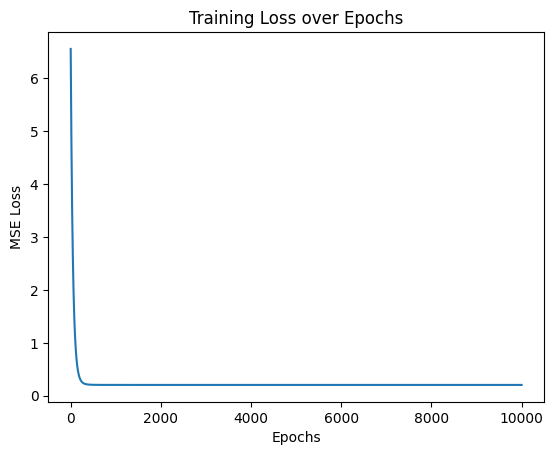

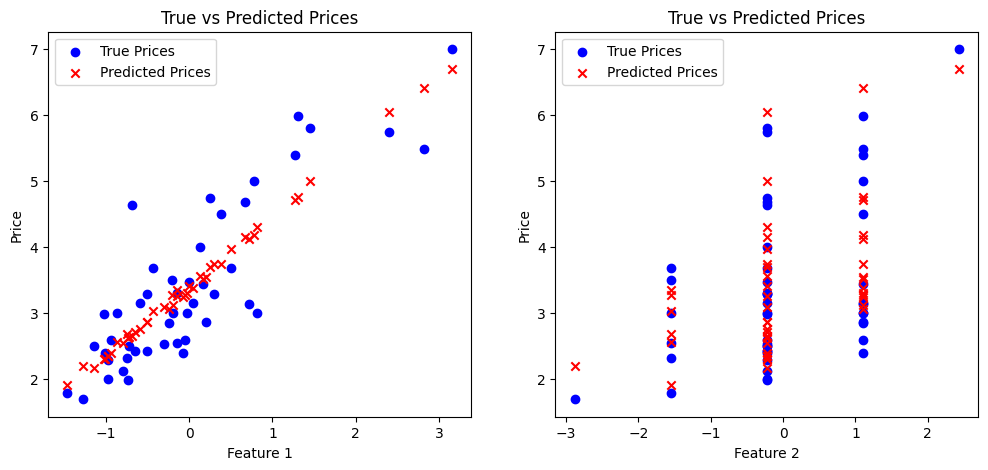

In [ ]:
X_train, y_train = load_data(path='./data/ex1data2.txt')

# y标签较大，同除以100000
y_train /= 100000
X_train, X_mean, X_std = Z_score_normalize(X_train)

W, b, loss_list = train(X_train, y_train, learning_rate=0.01, epochs=10000)

# 预测训练集（因为已经标准化过了，所以用forward函数）
y_pred = forward(X_train, W, b)      
print(f'Final parameters: W: {W}, b: {b}') 

# 预测新数据（用predict函数）
X_new = np.array([[1650, 3]])
y_new_pred = predict(X_new, W, b, X_mean, X_std)
print(f'Predicted price for house with 1650 sq-ft and 3 br: {y_new_pred[0] * 100000}')

# 可视化损失曲线和预测结果
plot_loss(loss_list)
show(X_train, y_train, y_pred)


Sklearn parameters: W: [ 1.09447796 -0.06578355], b: 3.404126595744681


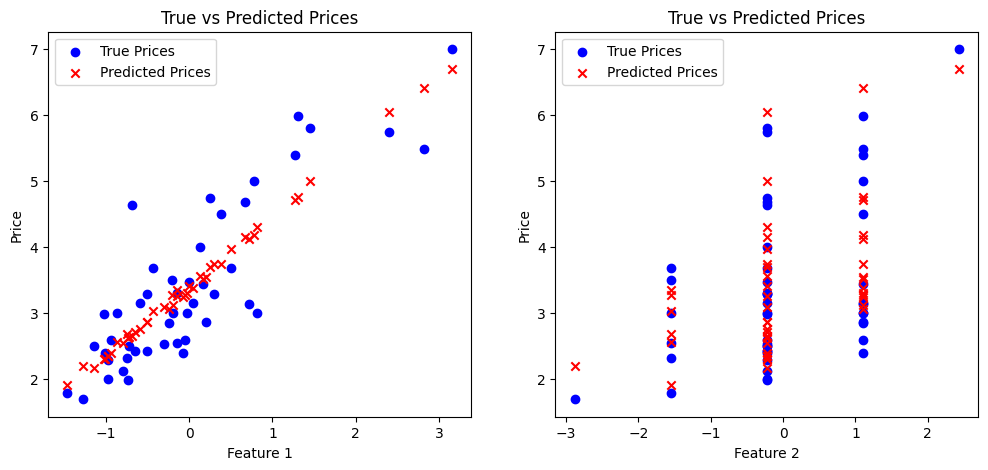

In [47]:
# 使用sklearn进行对比
model = LinearRegression()
model.fit(X_train, y_train)
y_sklearn_pred = model.predict(X_train)
print(f'Sklearn parameters: W: {model.coef_}, b: {model.intercept_}')
show(X_train, y_train, y_sklearn_pred)
